In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
#Preparing data and cleaning data
df = pd.read_csv('placement-dataset.csv')
df.drop(['Unnamed: 0'], axis= 1)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [5]:
#Create predictor variables and response variables, 0 is not graduated, 1 is graduated
feature_cols = ['cgpa', 'iq']
X = df[feature_cols]
Y = df.placement
#Create train and test data with train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2)
# Display training and testing data
print("Training data X:", X_train)
print("Training labels y:", Y_train)
print("Testing data X:", X_test)
print("Testing labels y:", Y_test)

Training data X:     cgpa     iq
5    7.1   48.0
25   5.0   91.0
77   7.3   50.0
74   6.7  154.0
62   6.0  102.0
..   ...    ...
43   6.8  141.0
22   4.9  120.0
72   7.3  116.0
15   5.1  176.0
40   4.9  134.0

[75 rows x 2 columns]
Training labels y: 5     1
25    0
77    1
74    1
62    0
     ..
43    1
22    0
72    1
15    0
40    0
Name: placement, Length: 75, dtype: int64
Testing data X:     cgpa     iq
83   7.5  130.0
30   7.6  128.0
56   6.1   65.0
24   4.7  121.0
16   5.2  224.0
23   4.7   87.0
2    5.3  121.0
27   6.0  124.0
28   5.2   90.0
13   6.4  116.0
99   6.2  113.0
92   5.2  110.0
76   4.9  155.0
14   6.1  103.0
0    6.8  123.0
21   7.1  151.0
3    7.4  132.0
29   7.0  112.0
61   7.3  137.0
79   6.5   90.0
35   6.8   90.0
11   6.9  138.0
84   5.7  169.0
44   7.5   61.0
73   4.9   61.0
Testing labels y: 83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
99    1
92    0
76    0
14    0
0     1
21    1
3     1
29    1
61    1
79    1
35    1
1

In [28]:
#Using logistic regression library to create prediction using training dataset
logreg = LogisticRegression(random_state = 2)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=2)

In [38]:
#Monitoring coefficient and intercept of the model
print('koefisien: ', logreg.coef_)
print('\nIntercept model: ', logreg.intercept_)

koefisien:  [[ 2.90189957 -0.00444346]]

Intercept model:  [-16.78758228]


In [32]:
#Create prediction using testing dataset
Y_pred = logreg.predict(X_test)
#Count evaluation model
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 9,  2],
       [ 0, 14]], dtype=int64)

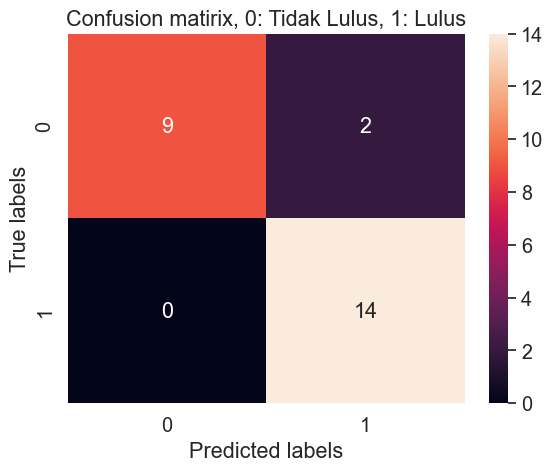

<Figure size 1000x700 with 0 Axes>

In [36]:
#Visualise confusion matrix
matrix = pd.DataFrame(cnf_matrix)
sns.set(font_scale=1.3)
axis = plt.axes()
plt.figure(figsize=(10,7))
axis.set_title('Confusion matirix, 0: Tidak Lulus, 1: Lulus')
sns.heatmap(matrix, annot= True, fmt='g', ax= axis)
axis.set_xlabel('Predicted labels')
axis.set_ylabel('True labels')
plt.show()

In [37]:
#Model report
target_names = ['Tidak Lulus Placement', 'Lulus Placement']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Tidak Lulus Placement       1.00      0.82      0.90        11
      Lulus Placement       0.88      1.00      0.93        14

             accuracy                           0.92        25
            macro avg       0.94      0.91      0.92        25
         weighted avg       0.93      0.92      0.92        25

